```
Nama          : Roikhatul Miskiyah
Kode Peserta  : PYTN-KS05-010
Batch         : 5
Assignment    : 2
```


**Outline:**
```
A. Measure of Central Tendency: Mean     (P/N/S)
B. Measure of Central Tendency: Median   (P/N/S)
C. Measure of Central Tendency: Modus    (P/N/S)
D. Measure of Spread: Range              (P/N/S)
E. Measure of Spread: Variance           (P/N/S)
F. Measure of Spread: Standard Deviation (P/N/S)
G. Probability Distribution              (+C)
H. Confidence Intervals
I. Hypothesis Testing                    (+C)

*for each (A - I):
- Question/what data we want to look up
- Pre-processing if needed

===
Keterangan:
(P/N/S) : Pandas / NumPy / Scipy
(+C)    : +Conclusion (menarik informasi/kesimpulan)

===
```

In [67]:
# Import Dataset
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
dt_nyc = pd.read_csv("nyc-rolling-sales.csv")

In [69]:
dt_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [70]:
dt_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [71]:
dt_nyc.shape

(84548, 22)

In [72]:
dt_nyc.isnull()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [73]:
dt_nyc.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [74]:
# identifikasi duplikat data
dup = dt_nyc.duplicated()
dup

0        False
1        False
2        False
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Length: 84548, dtype: bool

In [75]:
dup.any()

False

In [76]:
# ubah variable tipe object --> category
dt_nyc['BUILDING CLASS AT PRESENT'] = dt_nyc['BUILDING CLASS AT PRESENT'].astype('category')
dt_nyc['NEIGHBORHOOD'] = dt_nyc['NEIGHBORHOOD'].astype('category')
dt_nyc['BUILDING CLASS CATEGORY'] = dt_nyc['BUILDING CLASS CATEGORY'].astype('category')
dt_nyc['TAX CLASS AT PRESENT'] = dt_nyc['TAX CLASS AT PRESENT'].astype('category')
dt_nyc['ADDRESS'] = dt_nyc['ADDRESS'].astype('category')
dt_nyc['BUILDING CLASS AT TIME OF SALE'] = dt_nyc['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [77]:
dt_nyc['BUILDING CLASS AT PRESENT_new'] = pd.core.arrays.categorical.Categorical(dt_nyc['BUILDING CLASS AT PRESENT']).codes
dt_nyc['NEIGHBORHOOD_new'] = pd.core.arrays.categorical.Categorical(dt_nyc['NEIGHBORHOOD']).codes
dt_nyc['BUILDING CLASS CATEGORY_new'] = pd.core.arrays.categorical.Categorical(dt_nyc['BUILDING CLASS CATEGORY']).codes
dt_nyc['TAX CLASS AT PRESENT_new'] =pd.core.arrays.categorical.Categorical(dt_nyc['TAX CLASS AT PRESENT']).codes
dt_nyc['ADDRESS_new'] = pd.core.arrays.categorical.Categorical(dt_nyc['ADDRESS']).codes
dt_nyc['BUILDING CLASS AT TIME OF SALE_new'] = pd.core.arrays.categorical.Categorical(dt_nyc['BUILDING CLASS AT TIME OF SALE']).codes

In [78]:
# menghapus kolom yang tidak digunakan 
dt_nyc.drop(['EASE-MENT','APARTMENT NUMBER','Unnamed: 0','ZIP CODE'],axis=1, inplace=True)

In [79]:
dt_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,2,C2,6625000,2017-07-19 00:00:00,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,2,C7,-,2016-12-14 00:00:00,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,2,C7,-,2016-12-09 00:00:00,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,2,C4,3936272,2016-09-23 00:00:00,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,2,C2,8000000,2016-11-17 00:00:00,16,1,6,6,35431,15


---
# A. Measure of Central Tendency : Mean

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

1. Berapa rata-rata tertinggi dan terendah dari dataset NYC Rolling Sales?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [80]:
# 1. pre-processing if needed
# menggunakan librrary Statistics
mean = dt_nyc.mean()

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

In [81]:
# 2. pemanggilan hasil mean
print(mean)

BOROUGH                                   2.998758
BLOCK                                  4237.218976
LOT                                     376.224015
RESIDENTIAL UNITS                         2.025264
COMMERCIAL UNITS                          0.193559
TOTAL UNITS                               2.249184
YEAR BUILT                             1789.322976
TAX CLASS AT TIME OF SALE                 1.657485
BUILDING CLASS AT PRESENT_new            47.573284
NEIGHBORHOOD_new                        127.367708
BUILDING CLASS CATEGORY_new               7.455043
TAX CLASS AT PRESENT_new                  3.526305
ADDRESS_new                           33608.317062
BUILDING CLASS AT TIME OF SALE_new       47.657106
dtype: float64


**Conclusion:**
    1. Berdasarkan hasil di atas menunjukkan bahwa rata-rata tertinggi diperoleh dari kolom BLOCK dengan nilai rata-rata 4237.218976, dan terendah diperoleh kolom COMMERCIAL UNITS  dengan nilai rata-rata 0.193559. 

---
# B. Measure of Central Tendency : Median

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

1. Berapa nilai tengah atau median tertinggi dan terendah dari dataset NYC Rolling Sales?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [89]:
# 1. pre-processing if needed
# menggunakan librrary Statistics
median = dt_nyc.median()

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

In [90]:
# 2. Implement/try-to-use statistical method here ..
print(median)

BOROUGH                                   3.0
BLOCK                                  3311.0
LOT                                      50.0
RESIDENTIAL UNITS                         1.0
COMMERCIAL UNITS                          0.0
TOTAL UNITS                               1.0
YEAR BUILT                             1940.0
TAX CLASS AT TIME OF SALE                 2.0
BUILDING CLASS AT PRESENT_new            20.0
NEIGHBORHOOD_new                        122.0
BUILDING CLASS CATEGORY_new               6.0
TAX CLASS AT PRESENT_new                  5.0
ADDRESS_new                           33806.5
BUILDING CLASS AT TIME OF SALE_new       19.0
dtype: float64


**Conclusion:**
    1. Berdasarkan hasil di atas menunjukkan bahwa median tertinggi diperoleh dari kolom ADDRESS_new dengan nilai rata-rata 33806.5 dan median terendah diperoleh kolom COMMERCIAL UNITS  dengan nilai median 0.0. 

---
# C. Measure of Central Tendency : Modus

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

1. Berapa nilai modus tertinggi dan terendah dari dataset NYC Rolling Sales?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [91]:
# 1. pre-processing if needed
# menggunakan librrary Statistics
modus = dt_nyc.mode()

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

In [92]:
# 2. Implement/try-to-use statistical method here ..
modus

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,1,0,...,1,R4,-,2017-06-29 00:00:00,29,87,0,1,8984,120


**Conclusion:**
    1. Berdasarkan hasil di atas menunjukkan bahwa modus yang sering muncul dari dataset NYC Rolling Sales adalah ADDRESS_new dengan total modus 8984.

---
# D. Measure of Spread: Range

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

1. Berapa nilai range data BOROUGH dari dataset NYC Rolling Sales?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [177]:
dt_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   BOROUGH                             84548 non-null  int64   
 1   NEIGHBORHOOD                        84548 non-null  category
 2   BUILDING CLASS CATEGORY             84548 non-null  category
 3   TAX CLASS AT PRESENT                84548 non-null  category
 4   BLOCK                               84548 non-null  int64   
 5   LOT                                 84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT           84548 non-null  category
 7   ADDRESS                             84548 non-null  category
 8   RESIDENTIAL UNITS                   84548 non-null  int64   
 9   COMMERCIAL UNITS                    84548 non-null  int64   
 10  TOTAL UNITS                         84548 non-null  int64   
 11  LAND SQUARE FEET            

In [178]:
# 1. pre-processing if needed
# menggunakan librrary Statistics
# mencari nilai maksimum
maks = dt_nyc["BOROUGH"].max()
maks

5

In [179]:
# mencari nilai maksimum
minm = dt_nyc["BOROUGH"].min()
minm

1

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

In [180]:
# 2. Implement/try-to-use statistical method here ..
Jarak = maks - minm
Jarak

4

**Conclusion:**
    1. Berdasarkan hasil di atas menunjukkan bahwa nilai range dari data BOROUGH berdasarkan dataset NYC ROlling Sales yang diambil dari nilai maksimal - nilai minimum mendapatkan hasil yaitu 4. 

---
# E. Measure of Spread: Variance

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

1. Berapa nilai varians atau jumlah kuadrat tertinggi dari nilai standar deviasi pada dataset NYC Rolling Sales?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [97]:
# 1. pre-processing if needed
# menggunakan librrary Statistics
varians = dt_nyc.var()

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

In [98]:
# 2. Implement/try-to-use statistical method here ..
varians

BOROUGH                               1.663558e+00
BLOCK                                 1.273250e+07
LOT                                   4.331441e+05
RESIDENTIAL UNITS                     2.795931e+02
COMMERCIAL UNITS                      7.591956e+01
TOTAL UNITS                           3.599590e+02
YEAR BUILT                            2.887396e+05
TAX CLASS AT TIME OF SALE             6.713200e-01
BUILDING CLASS AT PRESENT_new         2.626808e+03
NEIGHBORHOOD_new                      5.622463e+03
BUILDING CLASS CATEGORY_new           8.141408e+01
TAX CLASS AT PRESENT_new              7.660266e+00
ADDRESS_new                           3.748610e+08
BUILDING CLASS AT TIME OF SALE_new    2.656259e+03
dtype: float64

**Conclusion:**
    1. Berdasarkan hasil di atas menunjukkan bahwa variance tertinggi diperoleh dari kolom BUILDING CLASS CATEGORY_new dengan nilai variance sebesar 8.141408e+01.as_integer_ratio.

---
# F. Measure of Spread: Standard Deviation

**Question**  // *Deskripsi dari informasi apa yang ingin dicari/dihitung di step 2*

1. Berapa nilai standar deviasi atau simpangan baku terendah dari dataset NYC Rolling Sales?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum melakukan Proses Statistik*

In [99]:
# 1. pre-processing if needed
# menggunakan librrary Statistics
st_dev = dt_nyc.std()

**Implement statistical method** // *Mengimplementaskan Mean dari kolom/data spesifik menggunakan Pandas, NumPy, atau Scipy*

In [100]:
# 2. Implement/try-to-use statistical method here ..
st_dev

BOROUGH                                   1.289790
BLOCK                                  3568.263407
LOT                                     658.136814
RESIDENTIAL UNITS                        16.721037
COMMERCIAL UNITS                          8.713183
TOTAL UNITS                              18.972584
YEAR BUILT                              537.344993
TAX CLASS AT TIME OF SALE                 0.819341
BUILDING CLASS AT PRESENT_new            51.252398
NEIGHBORHOOD_new                         74.983088
BUILDING CLASS CATEGORY_new               9.022975
TAX CLASS AT PRESENT_new                  2.767719
ADDRESS_new                           19361.328170
BUILDING CLASS AT TIME OF SALE_new       51.538907
dtype: float64

**Conclusion:**
    1. Berdasarkan hasil di atas menunjukkan bahwa nilai standar deviasi terendah diperoleh kolom TAX CLASS AT TIME OF SALE dengan nilai standar deviasi sebesar 0.819341. 

---
# G. Probability Distribution

**Question**  // *Deskripsi dari informasi apa yang ingin dicari*

1.  Bagaimana distribusi probabilitas dari suatu dataset NYC Rolling Sales berdasarkan kolom BLOCK?

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum menerapkan visualisasi*

In [101]:
# 1. pre-processing if needed
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [102]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

**Create data visualization** // *Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik*

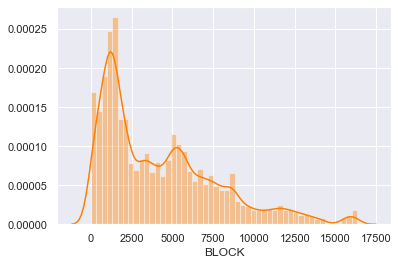

In [105]:
# 2. Implement/try-to-use statistical method here ..
sns.distplot(dt_nyc['BLOCK'],
            color='#FF7F00')

**Conclusion** // *Menarik informasi/kesimpulan berdasarkan area plot yang telah student buat*

1. Dari gambar di atas ditampilkan bahwasanya kurva distribusi probabilitas jarak nilai maksimal dan nilai nimimalnya sangat rentan jauh. Dan kondisi peluang  tersebut semakin banyak block semakin rendah hingga mencapai nilai 0. 

---
# H. Confidence Intervals

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum menerapkan visualisasi*

In [106]:
# 1. pre-processing if needed
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

**Create data visualization** // *Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik*

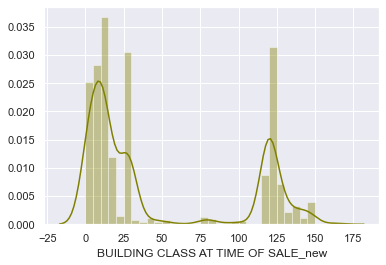

In [107]:
# 2. Implement/try-to-use statistical method here ..
# Melihat confidence interval berdasarkan BUILDING CLASS AT TIME OF SALE_new
sns.distplot(dt_nyc['BUILDING CLASS AT TIME OF SALE_new'],
            color='#808000')

In [108]:
CI = dt_nyc['BUILDING CLASS AT TIME OF SALE_new'].groupby(dt_nyc['BUILDING CLASS AT TIME OF SALE_new']).value_counts()

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'BUILDING CLASS AT TIME OF SALE_new')]

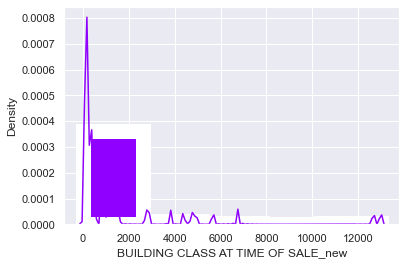

In [111]:
ax = sns.distplot(CI,
                  bins=5,
                  kde=True,
                  color='#8F00FF',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='BUILDING CLASS AT TIME OF SALE_new', ylabel='Density')

In [112]:
# analisis distribusi statistik berdasarkan data di atas
# Calculation Population Mean
pop_mean = dt_nyc['BUILDING CLASS AT TIME OF SALE_new'].mean()
pop_mean

47.65710602261437

In [113]:
# Calculate Population Standard Deviation
pop_std_dev= dt_nyc['BUILDING CLASS AT TIME OF SALE_new'].std()
pop_std_dev

51.53890677096752

In [114]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=dt_nyc['BUILDING CLASS AT TIME OF SALE_new'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

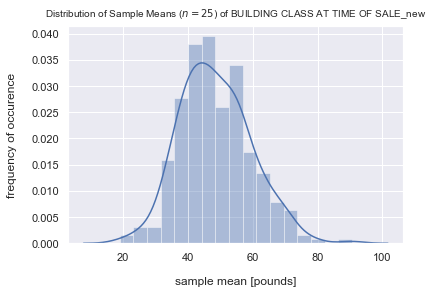

In [115]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of BUILDING CLASS AT TIME OF SALE_new", y=1.015, fontsize=10)
plt.xlabel("sample mean [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

## Kalkulasi Sample Distribusi (n=25)

In [116]:
# Calculate Mean of Sample Means
mean_of_sample_means = np.mean(sample_means)
mean_of_sample_means

48.49933333333333

In [117]:
# Calculate Median of Sample Means
median_of_sample_means = np.median(sample_means)
median_of_sample_means

47.34

In [118]:
# Calculate Varians of Sample Means
var_of_sample_means = np.var(sample_means)
var_of_sample_means

119.55314622222222

In [119]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

10.934036135948254

In [120]:
# Calculate Standard Error
standard_error = pop_std_dev/np.sqrt(n)
standard_error

10.307781354193505

In [121]:
# Calculate Critical Z-Scores
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [122]:
# The area under the curve between the z-critcal scores is approximately 0.95
1 - (tail * 2)

0.950004209703559

In [123]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

28.296081879114062

In [124]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

68.70258478755261

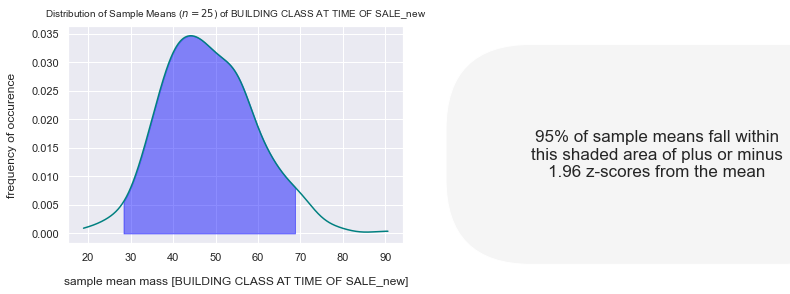

In [125]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 1000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 500)
plt.fill_between(shade, kde(shade), alpha=0.45, color='blue',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=5"))
plt.title("Distribution of Sample Means ($n=25$) of BUILDING CLASS AT TIME OF SALE_new", y=1.015, fontsize=10)
plt.xlabel("sample mean mass [BUILDING CLASS AT TIME OF SALE_new]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

# I. Hypothesis Testing

**Question**  // *Deskripsi dari informasi apa yang ingin dicari*

Apakah terdapat perbedaan unit yang terjual berdasarkan kategori bangunan pada dataset NYC ROlling Sales?

- alpha : 0.05
> Hipotesis
- H0 : Terdapat Perbedaan unit yang terjual berdasarkan kategori bangunan
- H1 : Tidak Terdapat Perbedaan unit yang terjual berdasarkan kategori bangunan
> Kriteria Uji
- Data memiliki korelasi apabila angka korelasi yang dihasilkan =! 0

**Pre-processing if needed** // *Student melakukan preproses dataset sebelum menerapkan visualisasi*

In [126]:
# 1. pre-processing if needed
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [127]:
dt_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   BOROUGH                             84548 non-null  int64   
 1   NEIGHBORHOOD                        84548 non-null  category
 2   BUILDING CLASS CATEGORY             84548 non-null  category
 3   TAX CLASS AT PRESENT                84548 non-null  category
 4   BLOCK                               84548 non-null  int64   
 5   LOT                                 84548 non-null  int64   
 6   BUILDING CLASS AT PRESENT           84548 non-null  category
 7   ADDRESS                             84548 non-null  category
 8   RESIDENTIAL UNITS                   84548 non-null  int64   
 9   COMMERCIAL UNITS                    84548 non-null  int64   
 10  TOTAL UNITS                         84548 non-null  int64   
 11  LAND SQUARE FEET            

In [128]:
dt_nyc.corr()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
BOROUGH,1.000000,0.417001,-0.277848,-0.023229,-0.005503,-0.023346,0.108303,-0.315163,-0.303971,-0.144981,-0.317936,-0.361609,0.040622,-0.311548
BLOCK,0.417001,1.000000,-0.229118,-0.015628,-0.003517,-0.015888,0.071262,-0.287300,-0.296627,-0.015612,-0.292885,-0.336206,-0.121320,-0.300279
LOT,-0.277848,-0.229118,1.000000,-0.034303,-0.010953,-0.033169,-0.289463,0.296680,0.657077,0.064599,0.450135,0.319449,-0.041106,0.681074
RESIDENTIAL UNITS,-0.023229,-0.015628,-0.034303,1.000000,0.015653,0.888309,0.025380,-0.001074,-0.033562,-0.008771,-0.024709,0.009022,0.003751,-0.035447
COMMERCIAL UNITS,-0.005503,-0.003517,-0.010953,0.015653,1.000000,0.472998,0.006428,0.049586,0.019020,-0.003299,0.030697,0.041650,0.003258,0.019494
TOTAL UNITS,-0.023346,-0.015888,-0.033169,0.888309,0.472998,1.000000,0.024568,0.026429,-0.018224,-0.009389,-0.001565,0.030853,0.004766,-0.019723
YEAR BUILT,0.108303,0.071262,-0.289463,0.025380,0.006428,0.024568,1.000000,-0.187609,-0.359724,-0.034196,-0.258683,-0.152360,-0.034959,-0.425983
TAX CLASS AT TIME OF SALE,-0.315163,-0.287300,0.296680,-0.001074,0.049586,0.026429,-0.187609,1.000000,0.510355,0.036727,0.935198,0.932756,0.009978,0.525264
BUILDING CLASS AT PRESENT_new,-0.303971,-0.296627,0.657077,-0.033562,0.019020,-0.018224,-0.359724,0.510355,1.000000,0.022864,0.644088,0.586269,0.022476,0.973161
NEIGHBORHOOD_new,-0.144981,-0.015612,0.064599,-0.008771,-0.003299,-0.009389,-0.034196,0.036727,0.022864,1.000000,0.034504,0.040401,-0.037837,0.023519


**Create data visualization** // *Mengimplementasikan area plot menggunakan matplotlib dengan data yang relevan dan sesuai dengan kegunaan plot/grafik*

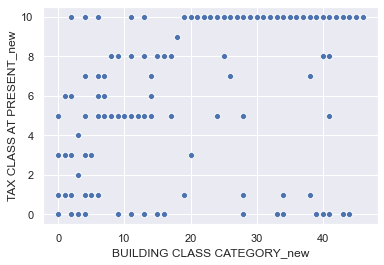

In [190]:
# 2. Implement/try-to-use statistical method here ..
# melihat analisis korelasi dataset NYC Rolling Sales antara data BUILDING CLASS CATEGORY dengan TAX CLASS AT PERSENT 
sns.scatterplot(x=dt_nyc["BUILDING CLASS CATEGORY_new"], 
                y=dt_nyc["TAX CLASS AT PRESENT_new"])

Berdasar analisis scatter plot di atas dikatakan bahwa penyebaran data antara BUILDING CLASS CATEGORY dengan TAX CLASS AT PERSENT berkorelasi positif.

**Asumsi :**
- Data berdistribusi Normal, id

- alpha : 0.05

**Hipotesis**
- H0 : BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT_new independen
- H1 : BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT_new dependen

**Kriteria Uji**
- Tolak H0 apabila p-value < alpha

In [191]:
from scipy.stats import spearmanr

In [192]:
stat, p = spearmanr(dt_nyc["BUILDING CLASS CATEGORY_new"], dt_nyc["TAX CLASS AT PRESENT_new"])
stat, p

(0.8554041380404678, 0.0)

In [193]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.000
Probably dependent


**Kesimpulan**

Berdasarkan hasil perhitungan di atas, didapatkan nilai p-value sebesar 0.00 < alpha = 0.05 yang berarti H0 ditolak atau BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT_new dependen (saling berhubungan).


**Akan dilakukan analisis korelasi menggunakan z-test**

**Asumsi :**
- Data berdistribusi Normal, id

- alpha : 0.05

**Hipotesis**
- H0 : sale price BOROUGH1 > BOROUGH2
- H1 : sale price BOROUGH1 < BOROUGH2

**Kriteria Uji**
- Tolak H0 apabila p-value < alpha


In [197]:
dt_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,2,C2,6625000,2017-07-19 00:00:00,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,2,C7,-,2016-12-14 00:00:00,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,2,C7,-,2016-12-09 00:00:00,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,2,C4,3936272,2016-09-23 00:00:00,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,2,C2,8000000,2016-11-17 00:00:00,16,1,6,6,35431,15


In [206]:
a = dt_nyc[dt_nyc['BOROUGH'] == 1]
b = dt_nyc[dt_nyc['BOROUGH'] == 2]

# Graded-Funtion
n1 = len(a)
mu1 = a["RESIDENTIAL UNITS"].mean()
sd1 = a["RESIDENTIAL UNITS"].std()
print(n1, mu1, sd1)

18306 2.307494810444663 22.23843884683196


In [207]:
n2 = len(b)
mu2 = b["RESIDENTIAL UNITS"].mean()
sd2 = b["RESIDENTIAL UNITS"].std()

print(n2, mu2, sd2)

7049 3.4366576819407006 23.672951272949888


In [209]:
sm.stats.ztest(a["RESIDENTIAL UNITS"].dropna(), 
               b["RESIDENTIAL UNITS"].dropna(), 
               alternative='two-sided')

(-3.557026602420361, 0.00037507618628452227)

**Conclusion** // *Menarik informasi/kesimpulan berdasarkan area plot yang telah student buat*

1. Berdasarkan hasil perhitungan di atas, didapatkan nilai p-value sebesar -3.557026602420361 < alpha = 0.05 yang berarti H0 ditolak atau RESIDENTIAL UNITS dari BOROUGH1 < BOROUGH2.

# J. Overall Analysis

1. Berdasarkan hasil perhitungan mean menunjukkan bahwa rata-rata tertinggi diperoleh dari kolom BLOCK dengan nilai rata-rata 4237.218976, dan terendah diperoleh kolom COMMERCIAL UNITS  dengan nilai rata-rata 0.193559. 
2.  Berdasarkan hasil perhitungan median menunjukkan bahwa median tertinggi diperoleh dari kolom ADDRESS_new dengan nilai rata-rata 33806.5 dan median terendah diperoleh kolom COMMERCIAL UNITS  dengan nilai median 0.0. 
3. Berdasarkan hasil perhitungan modus menunjukkan bahwa modus yang sering muncul dari dataset NYC Rolling Sales adalah ADDRESS_new dengan total modus 8984.
4. Berdasarkan hasil perhitungan range menunjukkan bahwa nilai range dari data BOROUGH berdasarkan dataset NYC ROlling Sales yang diambil dari nilai maksimal - nilai minimum mendapatkan hasil yaitu 4. 
5. Berdasarkan hasil perhitungan variance menunjukkan bahwa variance tertinggi diperoleh dari kolom BUILDING CLASS CATEGORY_new dengan nilai variance sebesar 8.141408e+01.as_integer_ratio.
6. Berdasarkan hasil perhitungan standar deviasi menunjukkan bahwa nilai standar deviasi terendah diperoleh kolom TAX CLASS AT TIME OF SALE dengan nilai standar deviasi sebesar 0.819341.
7. Dari gambar analisis distribusi probabilitas ditampilkan bahwasanya kurva distribusi probabilitas jarak nilai maksimal dan nilai nimimalnya sangat rentan jauh. Dan kondisi peluang  tersebut semakin banyak block semakin rendah hingga mencapai nilai 0. 
8. Berdasarkan hasil perhitungan di atas, didapatkan nilai p-value sebesar -3.557026602420361 < alpha = 0.05 yang berarti H0 ditolak atau RESIDENTIAL UNITS dari BOROUGH1 < BOROUGH2.

                                                                        --- Selesai ---